In [1]:
import numpy as np
import torch

seed = 42 #424
np.random.seed(seed)
torch.manual_seed(seed)
#NOTE! This only works for non cudnn. gpu needs
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

from helpers import showcase_code

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# for working with external files, otherwise kernels needs to be restarted each time
%load_ext autoreload
%autoreload 2


# Measures

## NLPD

## Error

## cobeau
 
## coverage ?

## distance from 'optimally informed Tsomething' (DOIT)


# experiment

## setup



### toy problem
parameters were obtained via non-exhaustive gridsearch, since the performance on the error is not the most important metric, the other metrics were not optimized for.

#### 100 times per model:


for i in range experiment:
  seed = f(i)
  model = new_model(seed=f(i))
  model.fit(X_train,y_train)
  outcomes = model.get_uncertainty(X_test,y_test)
  measures.append(get_measures(outcomes))
  
stats = mean/std(measures)
  
#### comparisson models:

##### optimal model

##### mean/std model

### kaggle problem


#### 100 times per model:


for i in range experiment:
  seed = f(i)
  model = new_model(seed=f(i))
  model.fit(X_train,y_train)
  outcomes = model.get_uncertainty(X_test,y_test)
  measures.append(get_measures(outcomes))
  
stats = mean/std(measures)

In [3]:
showcase_code('measures.py',showcase=True)

# Toy Problem

In [4]:
from data_loaders import get_X_y, generate_y
from measures import compute_cobeau, compute_nlpd, compute_error

from helpers import plot_uncertainty

In [5]:
toy = True

num_epochs = 300
if toy:
    num_epochs = 2000

num_experiments = 100


In [6]:
from nn_models.models import SaverModel, BobstrapEnsemble, DropoutModel
from nn_models.base_ensemble import VanillaEnsemble
from nn_models.ensembles import BootstrapEnsemble, ShuffleEnsemble

# Done toy BootstrapEnsemble, BobstrapEnsemble, SaverModel, ShuffleEnsemble, DropoutModel
# todo toy   VanillaEnsemble,

iters = 100
l2 = 1
n_std = 4

In [7]:
from experimentation import Experimentator

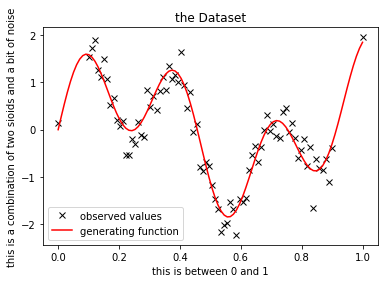

In [8]:
exp = Experimentator(num_experiments,num_epochs,BobstrapEnsemble,toy,seed=seed,generator_function = generate_y)

pre-training information not available for methods that rely on ensembling through time
the training for 2000 took 2.12674617767334 
pre-training information not available for methods that rely on ensembling through time
the training for 2000 took 2.110797882080078 
pre-training information not available for methods that rely on ensembling through time
the training for 2000 took 2.1667227745056152 
pre-training information not available for methods that rely on ensembling through time
the training for 2000 took 2.086491346359253 
pre-training information not available for methods that rely on ensembling through time
the training for 2000 took 2.0999369621276855 
pre-training information not available for methods that rely on ensembling through time
the training for 2000 took 2.124191999435425 
pre-training information not available for methods that rely on ensembling through time
the training for 2000 took 2.140523672103882 
pre-training information not available for methods that rely 

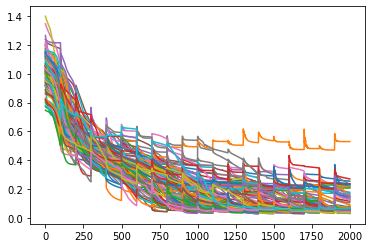

In [9]:
exp.run_experiment()

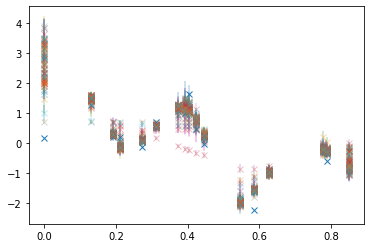

In [10]:
exp.plot_outcomes()

In [11]:
exp.analysis()

0.39324277646277234 0.05251562128064577
0.40221251565458443 0.32663942003881596
0.23966526641551322 0.30722207739003116
-0.6351836350018035 0.5178884822457276


0.39324277646277234 0.05251562128064577
0.40221251565458443 0.32663942003881596
0.23966526641551322 0.30722207739003116
-0.6351836350018035 0.5178884822457276


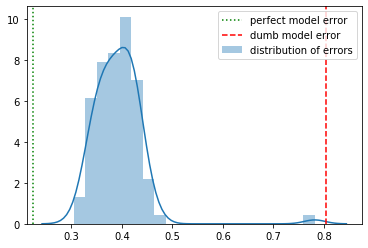

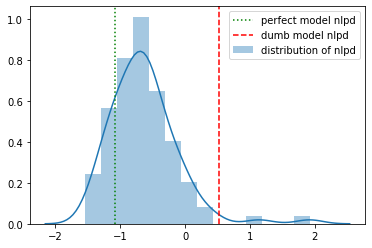

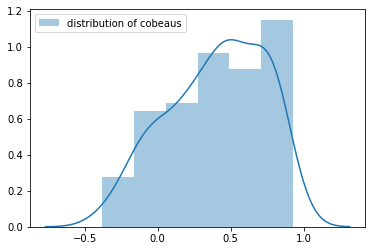

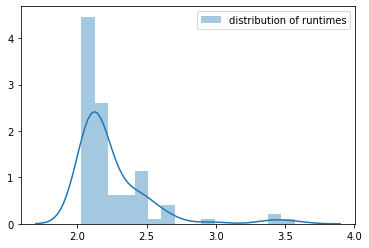

In [12]:
exp.plot_distribution_of_metrics()

15 31
 this many models: (100, 10)
cobeau: (0.4079012214137472, 0.1040937427955505)
nlpd: -1.370243738233313.
 nlpds of just mean and just std of the model:
0.5377464136941734


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\measures.py:11: RuntimeWarning: invalid value encountered in log
  nlpd = 1/2 * (y-y_pred)**2 / y_std + np.log(y_std)


nan
error: 0.3047853589209111
 this many models: (100, 10)
cobeau: (0.46760115151223364, 0.05839895588750999)
nlpd: 1.918606872435467.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.7818625870184044


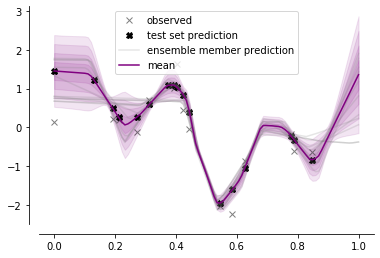

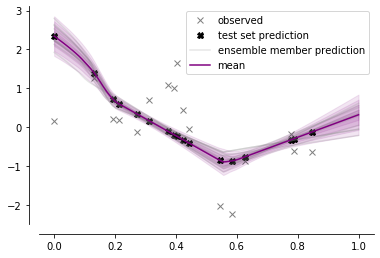

In [13]:
exp.plot_models()

32 79
 this many models: (100, 10)
cobeau: (-0.3787654752072177, 0.13380709138038382)
nlpd: 0.3870064049112577.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.34356896480499216
 this many models: (100, 10)
cobeau: (0.9266649662530649, 9.151740724978587e-08)
nlpd: -0.8722256418702943.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.41001891665016654


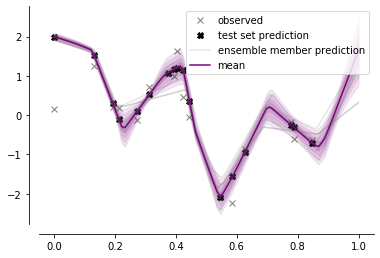

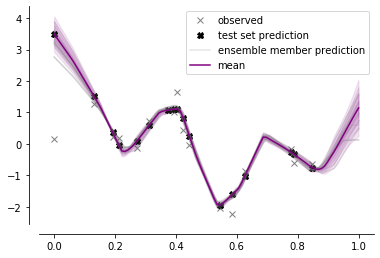

In [14]:
exp.plot_models('cobeau')

69 31
 this many models: (100, 10)
cobeau: (0.4781221959587383, 0.05222665709316995)
nlpd: -1.537395001064949.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.3266034265820444
 this many models: (100, 10)
cobeau: (0.46760115151223364, 0.05839895588750999)
nlpd: 1.918606872435467.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.7818625870184044


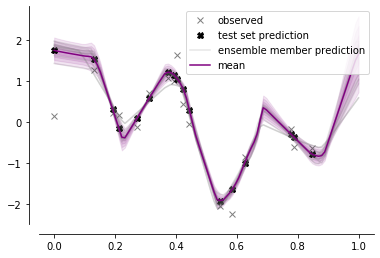

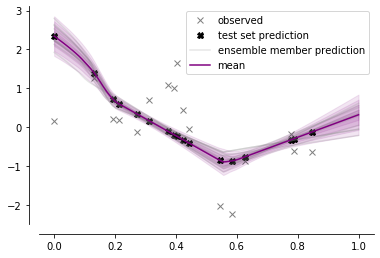

In [15]:
exp.plot_models('nlpd')

In [16]:
exp.stupid_function_error

0.8033239346307726

In [17]:
len(exp.stats_dict['analysis']['cobeau'])

100

In [18]:
len(exp.stats_dict['models'])

100

In [19]:
np.argmin(exp.stats_dict['analysis']['cobeau'])

32

In [20]:
# exp.stats_dict['analysis']['cobeau']

In [21]:
np.argmax([1,2,3])

2

In [22]:
import pickle

save_file = f"pickles\\{exp.model_name}_toy_{toy}_{num_experiments}.pkl"

with open(save_file, "wb") as f:
    pickle.dump(exp, f)

In [23]:
with  open(save_file, "rb") as f:
    exp2 = pickle.load(f)
    

69 31
 this many models: (100, 10)
cobeau: (0.4781221959587383, 0.05222665709316995)
nlpd: -1.537395001064949.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.3266034265820444
 this many models: (100, 10)
cobeau: (0.46760115151223364, 0.05839895588750999)
nlpd: 1.918606872435467.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.7818625870184044


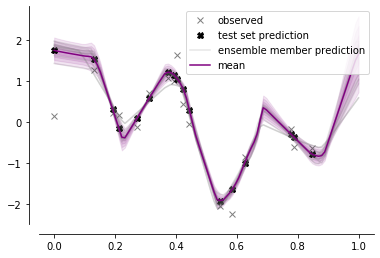

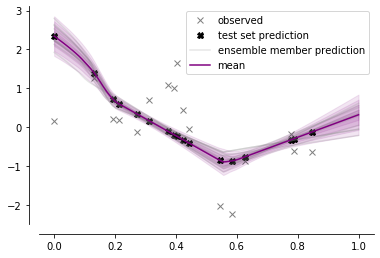

In [24]:
exp2.plot_models('nlpd')

# data analysis



In [25]:
test_string = "<class 'nn_models.models.SaverModel'>"

In [26]:
index_start = test_string.find('.models.')+len('.models.')
index_stop = test_string.find("'>")
new_string = test_string[index_start:index_stop]

In [27]:
new_string = test_string[index_start:index_stop]

In [28]:
new_string

'SaverModel'

In [29]:
type(SaverModel)

type

In [30]:
f'{SaverModel}'

"<class 'nn_models.models.SaverModel'>"